## Create White Noise

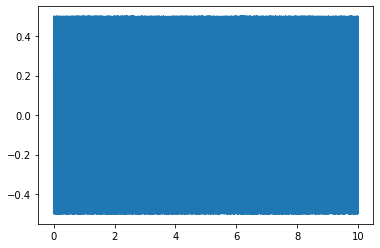

In [20]:
import numpy as np
from scipy.signal import iirdesign, freqs, freqz, lfilter
import matplotlib.pyplot as plt

stop = 10
Srate = 44100
x1=np.linspace(0, stop, Srate*stop)
A=0.5
y1 = np.random.rand(Srate * stop)-A

plt.plot(x1, y1)
plt.show();

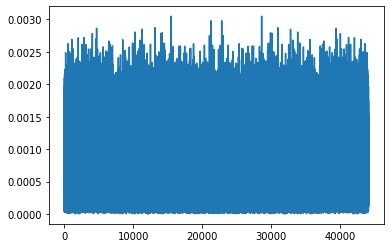

In [21]:
f  = np.linspace(1/float(stop), 44100, Srate * stop)
y11 = np.fft.fft(y1)/float(Srate * stop /2)
plt.plot(f, np.abs(y11))
plt.show();

## Settings

In [22]:
fs = Srate # 44100
nyq = fs / 2.0  # ナイキスト周波数
fe1 = 5000.0 / nyq      # カットオフ周波数1
fe2 = 10000.0 / nyq      # カットオフ周波数2
numtaps = 255           # フィルタ係数（タップ）の数（要奇数）

## Lowpass

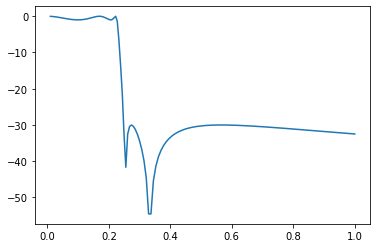

In [23]:
fsamp = 44100.0
fpass = 5000.0
fstop = 6000.0
nyq = fsamp/2
wp = fpass / nyq
ws = fstop / nyq

b,a = iirdesign(wp, ws, 1, 30, analog=True)
fs, h = freqs(b,a)
plt.plot(fs, 20*np.log10(np.abs(h)))

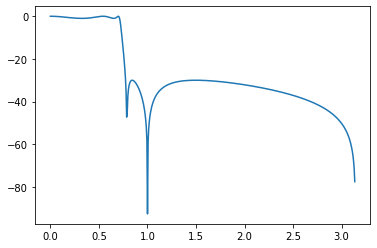

In [24]:
b,a = iirdesign(wp, ws, 1, 30, analog=False)
fs, h = freqz(b,a)
plt.plot(fs, 20*np.log10(np.abs(h)))

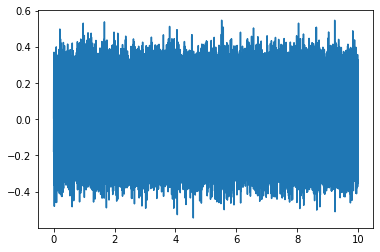

In [25]:
y = lfilter(b, a, y1)
plt.plot(x1, y)

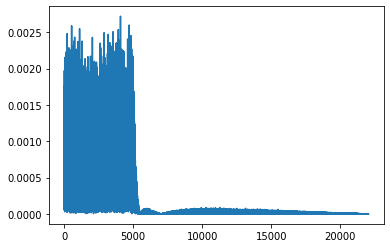

In [26]:
y = np.fft.rfft(y)/float(Srate * stop /2)
plt.plot(f[:int(len(f)/2)+1], np.abs(y))
plt.show();